# Analysis Plan
1. Separate Women Led and Non-Women Led Countries
2. Cluster countries based on attributes in World Bank dataset (like GDP per Capita)
3. Compare COVID response in countries with similar GDP, based on whether they are women-led or not


## Intro to COVID Response Dataset
The dataset I am using is the Oxford COVID-19 Government Response Tracker (OxCGRT). This dataset "systematically collects information on several different common policy responses that governments have taken to respond to the pandemic on 18 indicators such as school closures and travel restrictions". It has data from more than 180 countries.

This codebook contains the definitions of each of the variables in the dataset: 
https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

The primary indicators I'll be comparing are the health system policies, listed below. I will also be comparing the overall indexes in the dataset which combine individual factors. These indices are:  
- StringencyIndex
- GovernmentResponseIndex
- ContainmentHealthIndex: focusing on Containment and closure policies
- EconomicSupportIndex: focusing on Economic policies


### Health system policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| H1 | `H1_Public information campaigns` | Record presence of public info campaigns | Ordinal scale | 0 - no Covid-19 public information campaign <br/>1 - public officials urging caution about Covid-19 <br/>2- coordinated public information campaign (eg across traditional and social media) <br/>Blank - no data |
| | `H1_Flag` | | Binary flag for geographic scope |  0 - targeted <br/>1- general <br/>Blank - no data |
| H2 | `H2_Testing policy` | Record government policy on who has access to testing <br/><br/>Note: this records policies about testing for current infection (PCR tests) not testing for immunity (antibody test) | Ordinal scale | 0 - no testing policy <br/>1 - only those who both (a) have symptoms AND (b) meet specific criteria (eg key workers, admitted to hospital, came into contact with a known case, returned from overseas) <br/>2 - testing of anyone showing Covid-19 symptoms <br/>3 - open public testing (eg "drive through" testing available to asymptomatic people) <br/>Blank - no data |
| H3 | `H3_Contact tracing` | Record government policy on contact tracing after a positive diagnosis <br/><br/>Note: we are looking for policies that would identify all people potentially exposed to Covid-19; voluntary bluetooth apps are unlikely to achieve this | Ordinal scale | 0 - no contact tracing <br/>1 - limited contact tracing; not done for all cases <br/>2 - comprehensive contact tracing; done for all identified cases |
| H4 | `H4_Emergency investment in healthcare` | Announced short term spending on healthcare system, eg hospitals, masks, etc <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H5 | `H5_Investment in vaccines` | Announced public spending on Covid-19 vaccine development <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H6 | `H6_Facial Coverings` | Record policies on the use of facial coverings outside the home <br/> | Ordinal scale | 0 - No policy <br/>1 - Recommended <br/>2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible <br/>3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible <br/>4 - Required outside the home at all times regardless of location or presence of other people |

In [101]:
import pandas as pd
covid_response_df = pd.read_csv("OxCGRT_latest.csv")

# This codebook contains the definitions of each of the variables in the dataset: 
# https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
covid_response_df

/Users/mac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,20200102,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,20200103,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,20200104,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,20200105,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
5,Aruba,ABW,NaN,NaN,20200106,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
6,Aruba,ABW,NaN,NaN,20200107,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
7,Aruba,ABW,NaN,NaN,20200108,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
8,Aruba,ABW,NaN,NaN,20200109,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
9,Aruba,ABW,NaN,NaN,20200110,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [102]:
# Listing the columns
list(covid_response_df.columns)

['CountryName',
 'CountryCode',
 'RegionName',
 'RegionCode',
 'Date',
 'C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C5_Flag',
 'C6_Stay at home requirements',
 'C6_Flag',
 'C7_Restrictions on internal movement',
 'C7_Flag',
 'C8_International travel controls',
 'E1_Income support',
 'E1_Flag',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'H6_Facial Coverings',
 'H6_Flag',
 'M1_Wildcard',
 'ConfirmedCases',
 'ConfirmedDeaths',
 'StringencyIndex',
 'StringencyIndexForDisplay',
 'StringencyLegacyIndex',
 'StringencyLegacyIndexForDisplay',
 'GovernmentResponseIndex',
 'GovernmentResponseIndexForDisplay',
 'ContainmentHealthIndex',
 'ContainmentHealthI

## World Bank Data
Now that we have the data on a government's COVID response, we want to compare counties that are similar in terms of GDP and country attributes. To get this, we can load up data fromm the World Bank on World_Development_Indicators for each country. We will use the data for 2019 since 2020 is not yet over. The data can be found at https://databank.worldbank.org/source/world-development-indicators

In [103]:
# df3 = pd.read_csv("country_data.csv")
# df3
world_bank_df = pd.read_excel("Data_Extract_From_World_Development_Indicators.xlsx")
world_bank_df

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..
1,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.91014e+10,..
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,502.115,..
4,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.90123,..
5,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,..,..
6,Afghanistan,AFG,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,0.400284
7,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..
8,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..
9,Afghanistan,AFG,"Population ages 65 and above, total",SP.POP.65UP.TO,995094,..


In [104]:
# Exploring the data in the World Bank dataset
world_bank_df['Series Name'].unique()

array(['Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'GDP (current US$)', 'GDP per capita (current US$)',
       'GDP growth (annual %)', 'Gini index (World Bank estimate)',
       'Human capital index (HCI) (scale 0-1)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Life expectancy at birth, total (years)',
       'Population ages 65 and above, total',
       'Population growth (annual %)',
       'Population density (people per sq. km of land area)',
       'Population, total',
       'Population in urban agglomerations of more than 1 million',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       nan], dtype=object)

# Now, we have to join the datasets together

In [105]:
joined_df = covid_response_df.merge(world_bank_df, how = 'inner', left_on='CountryCode',right_on='Country Code')
joined_df

,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020]
0,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..
1,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..
2,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,..,..
3,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..
4,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..
5,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,..,..
6,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,..
7,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..
8,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..
9,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Aruba,ABW,"Population ages 65 and above, total",SP.POP.65UP.TO,14946,..


# Marking women-led countries

In [108]:
list_of_women_led_countries = ["Bolivia","Bangladesh","Barbados","Belgium","Denmark","Estonia","Ethiopia","Finland","Gabon","Georgia","Germany","Greece","Iceland","Nepal","New Zealand","Norway","Serbia","Singapore","Slovakia","Switzerland","Togo","Trinidad and Tobago"]    

def add_gender_column(row):
    if row['CountryName'] in (list_of_women_led_countries):
        return "female"
    else:
        return "male"

joined_df['gender']  = joined_df.apply (lambda row: add_gender_column(row), axis=1)

# Transform Data by Country

In [109]:
# Adding a GDP and HCI column
def add_GDP_column(row):
    if row['Series Name'] == 'GDP per capita (current US$)' and row['2019 [YR2019]'] != '..':
        return float(row['2019 [YR2019]'])
    else: 
        return 0
def add_HCI_column(row): 
    if row['Series Name'] == 'Human capital index (HCI) (scale 0-1)' and row['2020 [YR2020]'] != '..':
        return float(row['2020 [YR2020]'])
    else: 
        return 0    
joined_df['GDP_Per_Capita']  = joined_df.apply (lambda row: add_GDP_column(row), axis=1)
joined_df['HCI']  = joined_df.apply (lambda row: add_HCI_column(row), axis=1)

In [110]:
joined_df['GDP_Per_Capita']

0             0.00000
1             0.00000
2             0.00000
3             0.00000
4             0.00000
5             0.00000
6             0.00000
7             0.00000
8             0.00000
9             0.00000
10            0.00000
11            0.00000
12            0.00000
13            0.00000
14            0.00000
15            0.00000
16            0.00000
17            0.00000
18            0.00000
19            0.00000
20            0.00000
21            0.00000
22            0.00000
23            0.00000
24            0.00000
25            0.00000
26            0.00000
27            0.00000
28            0.00000
29            0.00000
              ...    
1066470       0.00000
1066471       0.00000
1066472       0.00000
1066473    1463.98591
1066474       0.00000
1066475       0.00000
1066476       0.00000
1066477       0.00000
1066478       0.00000
1066479       0.00000
1066480       0.00000
1066481       0.00000
1066482       0.00000
1066483       0.00000
1066484   

In [111]:
# Group by country name 
grouped_df = joined_df.groupby("CountryName")
# Get maximum values over time 
maximum_values_over_time_df = grouped_df.max()

In [112]:
# Add buckets to COVID Response dataframe
# Make 5 equal buckets for GDP Per Capita, from 0 to 1
maximum_values_over_time_df['GDP_bucket'] = pd.qcut(maximum_values_over_time_df['GDP_Per_Capita'], q=5)

# Make 5 equal buckets for Human Capital Index, from 0 to 1
maximum_values_over_time_df['HCI_bucket'] = pd.qcut(maximum_values_over_time_df['HCI'], q=5)

In [113]:
maximum_values_over_time_df

,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,gender,GDP_Per_Capita,HCI,GDP_bucket,HCI_bucket
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,0.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,male,502.115487,0.400284,"(-0.001, 774.84]","(0.371, 0.458]"
Albania,ALB,20201026,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Albania,ALB,"Population, total",SP.POP.TOTL,male,5352.857411,0.634251,"(2973.591, 7402.355]","(0.584, 0.69]"
Algeria,DZA,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,62.5,Algeria,DZA,"Population, total",SP.POP.TOTL,male,3948.343279,0.534556,"(2973.591, 7402.355]","(0.458, 0.584]"
Andorra,AND,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,100.0,Andorra,AND,"Population, total",SP.POP.TOTL,male,40886.391165,0.000000,"(23145.041, 114704.594]","(-0.001, 0.371]"
Angola,AGO,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Angola,AGO,"Population, total",SP.POP.TOTL,male,2973.591160,0.362405,"(774.84, 2973.591]","(-0.001, 0.371]"
Argentina,ARG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Argentina,ARG,"Population, total",SP.POP.TOTL,male,10006.148974,0.602145,"(7402.355, 23145.041]","(0.584, 0.69]"
Aruba,ABW,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Aruba,ABW,"Population, total",SP.POP.TOTL,male,0.000000,0.000000,"(-0.001, 774.84]","(-0.001, 0.371]"
Australia,AUS,20201026,3.0,0.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Australia,AUS,"Population, total",SP.POP.TOTL,male,54907.101910,0.770240,"(23145.041, 114704.594]","(0.69, 0.879]"
Austria,AUT,20201026,2.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Austria,AUT,"Population, total",SP.POP.TOTL,male,50277.275087,0.746740,"(23145.041, 114704.594]","(0.69, 0.879]"


In [114]:
joined_df

,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020],gender,GDP_Per_Capita,HCI
0,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..,male,0.00000,0.000000
1,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..,male,0.00000,0.000000
2,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,..,..,male,0.00000,0.000000
3,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,male,0.00000,0.000000
4,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,male,0.00000,0.000000
5,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,..,..,male,0.00000,0.000000
6,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,..,male,0.00000,0.000000
7,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..,male,0.00000,0.000000
8,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..,male,0.00000,0.000000
9,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Aruba,ABW,"Population ages 65 and above, total",SP.POP.65UP.TO,14946,..,male,0.00000,0.000000


## Grabbing the women-led countries

In [115]:
# Creating separate DF of women-led countries
women_led_countries_df = joined_df[joined_df['CountryName'].isin(list_of_women_led_countries)]
print("# of women-led countries")
print(women_led_countries_df['CountryName'].nunique())

non_women_led_countries_df = joined_df[~joined_df['CountryName'].isin(list_of_women_led_countries)]
print("# of non-women-led countries")
print(non_women_led_countries_df['CountryName'].nunique())

women_led_countries_df

# of women-led countries
21
# of non-women-led countries
160


,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020],gender,GDP_Per_Capita,HCI
49500,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..,female,0.000000,0.000000
49501,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..,female,0.000000,0.000000
49502,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,GDP (current US$),NY.GDP.MKTP.CD,5.29607e+11,..,female,0.000000,0.000000
49503,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,46116.7,..,female,46116.699234,0.000000
49504,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.40446,..,female,0.000000,0.000000
49505,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,Gini index (World Bank estimate),SI.POV.GINI,..,..,female,0.000000,0.000000
49506,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,0.76042,female,0.000000,0.760420
49507,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..,female,0.000000,0.000000
49508,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..,female,0.000000,0.000000
49509,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,Belgium,BEL,"Population ages 65 and above, total",SP.POP.65UP.TO,2182725,..,female,0.000000,0.000000


## Now that we have combined data, we can bucket countries based on their GDP

In [116]:
women_maximum_values_over_time = maximum_values_over_time_df[maximum_values_over_time_df['Country Name'].isin(list_of_women_led_countries)]
women_maximum_values_over_time


non_women_maximum_values_over_time = maximum_values_over_time_df[~maximum_values_over_time_df['Country Name'].isin(list_of_women_led_countries)]
non_women_maximum_values_over_time

,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,gender,GDP_Per_Capita,HCI,GDP_bucket,HCI_bucket
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,0.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,male,502.115487,0.400284,"(-0.001, 774.84]","(0.371, 0.458]"
Albania,ALB,20201026,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Albania,ALB,"Population, total",SP.POP.TOTL,male,5352.857411,0.634251,"(2973.591, 7402.355]","(0.584, 0.69]"
Algeria,DZA,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,62.5,Algeria,DZA,"Population, total",SP.POP.TOTL,male,3948.343279,0.534556,"(2973.591, 7402.355]","(0.458, 0.584]"
Andorra,AND,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,100.0,Andorra,AND,"Population, total",SP.POP.TOTL,male,40886.391165,0.000000,"(23145.041, 114704.594]","(-0.001, 0.371]"
Angola,AGO,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Angola,AGO,"Population, total",SP.POP.TOTL,male,2973.591160,0.362405,"(774.84, 2973.591]","(-0.001, 0.371]"
Argentina,ARG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Argentina,ARG,"Population, total",SP.POP.TOTL,male,10006.148974,0.602145,"(7402.355, 23145.041]","(0.584, 0.69]"
Aruba,ABW,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Aruba,ABW,"Population, total",SP.POP.TOTL,male,0.000000,0.000000,"(-0.001, 774.84]","(-0.001, 0.371]"
Australia,AUS,20201026,3.0,0.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Australia,AUS,"Population, total",SP.POP.TOTL,male,54907.101910,0.770240,"(23145.041, 114704.594]","(0.69, 0.879]"
Austria,AUT,20201026,2.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Austria,AUT,"Population, total",SP.POP.TOTL,male,50277.275087,0.746740,"(23145.041, 114704.594]","(0.69, 0.879]"


In [117]:
# Group by bucket, compare mean values 
gdp_bucket_women_led = women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
gdp_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)

hci_bucket_women_led = women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
hci_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)


gdp_bucket_women_led

,GDP_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 774.84]",72.220000,75.000000,69.050,73.150000,1.0,1.000000,2.000000,1.004060e+06,0.000000e+00,3.000000
1,"(774.84, 2973.591]",83.680000,66.666667,78.870,90.126667,1.0,1.666667,1.333333,8.478032e+07,0.000000e+00,3.666667
2,"(2973.591, 7402.355]",86.806667,50.000000,80.360,98.766667,1.0,2.000000,1.666667,1.223393e+08,0.000000e+00,2.666667
3,"(7402.355, 23145.041]",79.512500,78.125000,78.125,86.342500,1.0,2.500000,2.000000,6.985444e+06,8.106262e+05,3.250000
4,"(23145.041, 114704.594]",69.792000,83.750000,70.656,76.389000,1.0,2.400000,1.800000,6.650591e+09,1.382786e+08,2.200000


In [118]:
# Group by bucket, compare mean values 
gdp_bucket_women_led = women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
gdp_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)

hci_bucket_women_led = women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
hci_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)


gdp_bucket_women_led

,GDP_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 774.84]",72.220000,75.000000,69.050,73.150000,1.0,1.000000,2.000000,1.004060e+06,0.000000e+00,3.000000
1,"(774.84, 2973.591]",83.680000,66.666667,78.870,90.126667,1.0,1.666667,1.333333,8.478032e+07,0.000000e+00,3.666667
2,"(2973.591, 7402.355]",86.806667,50.000000,80.360,98.766667,1.0,2.000000,1.666667,1.223393e+08,0.000000e+00,2.666667
3,"(7402.355, 23145.041]",79.512500,78.125000,78.125,86.342500,1.0,2.500000,2.000000,6.985444e+06,8.106262e+05,3.250000
4,"(23145.041, 114704.594]",69.792000,83.750000,70.656,76.389000,1.0,2.400000,1.800000,6.650591e+09,1.382786e+08,2.200000


In [119]:
hci_bucket_women_led

,HCI_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 0.371]",82.985000,56.250000,77.385000,92.595000,1.0,1.500000,1.500000,5.069396e+07,0.000000e+00,2.500000
1,"(0.371, 0.458]",74.766667,70.833333,73.016667,78.396667,1.0,1.666667,1.666667,5.233469e+07,0.000000e+00,3.000000
2,"(0.458, 0.584]",90.163333,62.500000,83.830000,96.606667,1.0,2.000000,1.666667,8.565698e+07,0.000000e+00,3.333333
3,"(0.584, 0.69]",85.070000,68.750000,80.955000,95.370000,1.0,2.500000,2.000000,6.613039e+07,0.000000e+00,3.500000
4,"(0.69, 0.879]",69.886364,84.090909,70.780000,77.104545,1.0,2.454545,1.818182,6.046235e+09,1.260026e+08,2.363636


In [120]:
gdp_bucket_non_women_led

,GDP_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 774.84]",73.115143,36.742424,66.264412,80.767143,1.0,2.057143,1.485714,2.483855e+07,0.000000e+00,2.750000
1,"(774.84, 2973.591]",75.520938,57.031250,70.694063,81.583438,1.0,1.812500,1.562500,3.065169e+08,4.126775e+05,3.060606
2,"(2973.591, 7402.355]",82.155152,57.575758,77.704848,89.225455,1.0,2.151515,1.727273,3.389439e+08,1.236866e+07,3.000000
3,"(7402.355, 23145.041]",79.676250,69.531250,77.139687,85.416875,1.0,2.250000,1.812500,1.692543e+09,1.804296e+08,3.093750
4,"(23145.041, 114704.594]",75.066923,77.884615,75.137308,79.059615,1.0,2.538462,1.961538,1.121840e+10,5.084512e+08,2.884615


In [121]:
hci_bucket_non_women_led

,HCI_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 0.371]",76.817941,43.750000,70.292424,84.218529,1.0,2.205882,1.529412,5.049411e+07,0.000000e+00,3.000000
1,"(0.371, 0.458]",73.491562,50.000000,68.163437,80.135937,1.0,1.750000,1.593750,2.658930e+08,0.000000e+00,2.909091
2,"(0.458, 0.584]",81.113636,55.681818,76.785758,87.977273,1.0,2.030303,1.545455,2.179279e+08,1.668316e+07,3.062500
3,"(0.584, 0.69]",80.371765,68.750000,77.591765,85.430294,1.0,2.294118,1.911765,1.729919e+09,1.505928e+08,3.029412
4,"(0.69, 0.879]",72.610800,80.500000,73.142800,77.407600,1.0,2.520000,1.960000,1.166079e+10,5.497660e+08,2.760000


In [164]:
# gdp_bucket_women_led['GDP_bucket'].describe()

# gdp_bucket_women_led['GDP_bucket']

# gdp_bucket_women_led.groupby(by='GDP_bucket').value_counts()
gdp_bucket_women_led['GDP_bucket'].value_counts(normalize=True)

# df['Name'].value_counts(normalize=True)

(23145.041, 114704.594]    0.2
(7402.355, 23145.041]      0.2
(2973.591, 7402.355]       0.2
(774.84, 2973.591]         0.2
(-0.001, 774.84]           0.2
Name: GDP_bucket, dtype: float64

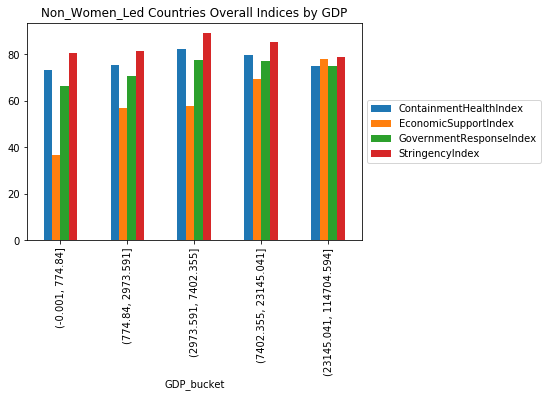

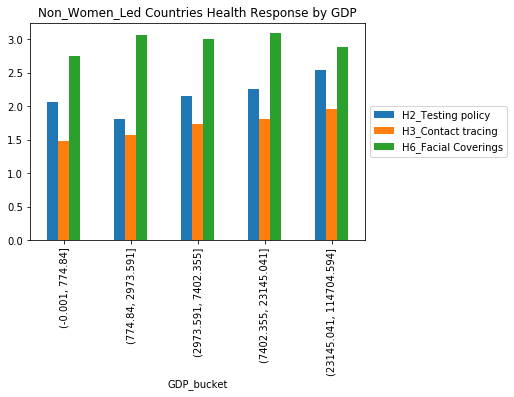

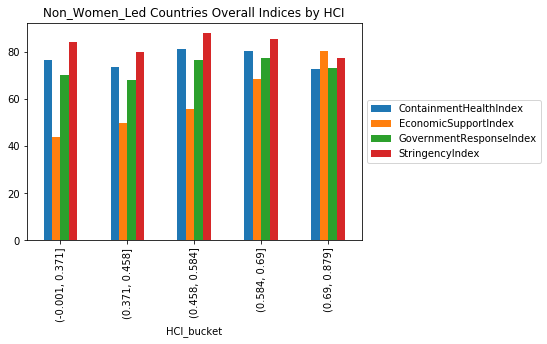

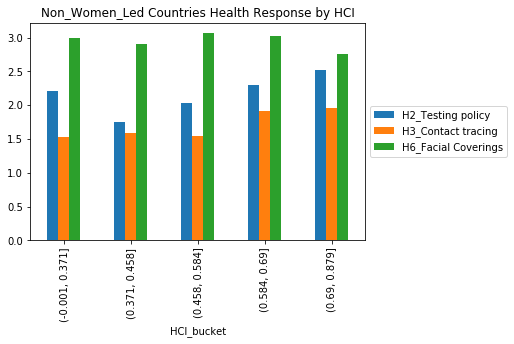

In [129]:
pltt = gdp_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Overall Indices by GDP', x="GDP_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
pltt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_non_women = gdp_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Health Response by GDP', x="GDP_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_non_women.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt_hci = hci_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Overall Indices by HCI', x="HCI_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_non_women_hci = hci_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Health Response by HCI', x="HCI_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_non_women_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


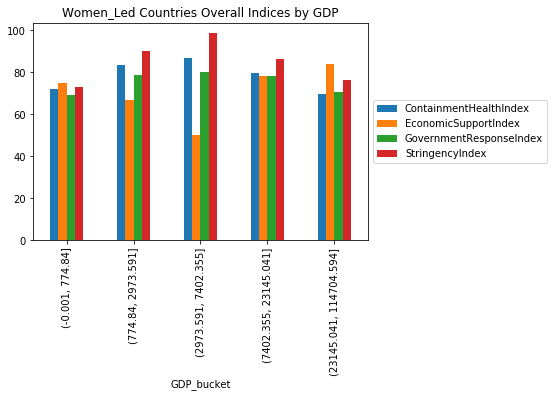

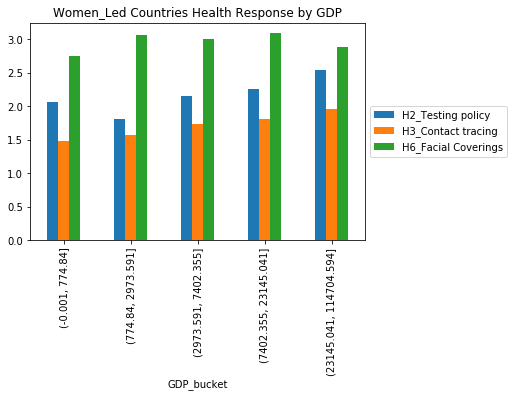

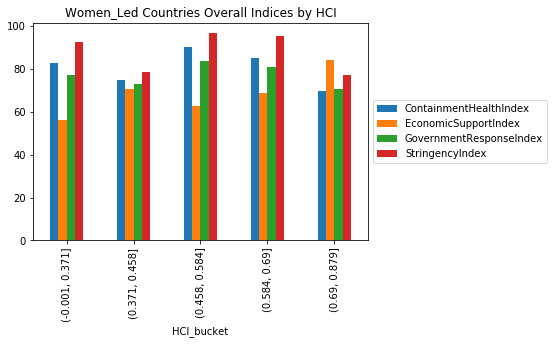

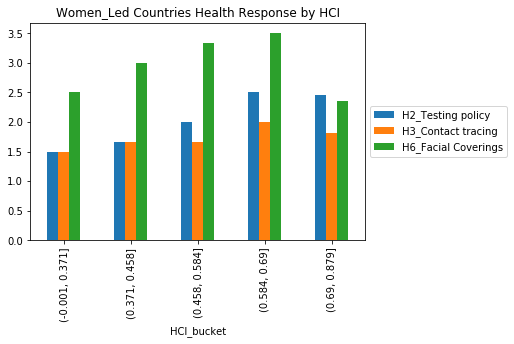

In [123]:
plt2 = gdp_bucket_women_led.plot(title = 'Women_Led Countries Overall Indices by GDP', x="GDP_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt3_women = gdp_bucket_non_women_led.plot(title = 'Women_Led Countries Health Response by GDP', x="GDP_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_women.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt_hci_2 = hci_bucket_women_led.plot(title = 'Women_Led Countries Overall Indices by HCI', x="HCI_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt_hci_2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_women_hci = hci_bucket_women_led.plot(title = 'Women_Led Countries Health Response by HCI', x="HCI_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_women_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## High Level Analysis
Some trends I've noticed from high level graphs:
- There is a significantly higher EconomicSupportIndex in the women_led countries across all GDP clusters
- Across both populations, as GDP per capita increases, EconomicSupportIndex tends to increase as well
- For women led countries, Containment Health Index tends to go down as GDP increases



# Index Specific Analysis
Below is a helper function to plot our data

In [149]:
import numpy as np

def plot_data(bucket_column_name, index_name):
    # Numbers of pairs of bars you want
    N = 2

    # Specify DF
    if bucket_column_name == "GDP_bucket":
        women_df = gdp_bucket_women_led
        non_women_df = gdp_bucket_non_women_led
    else: 
        women_df = hci_bucket_women_led
        non_women_df = hci_bucket_non_women_led
    
    # Specify the values of blue bars (height)
    non_women_bar = non_women_df[index_name]
    # Specify the values of green bars (height)
    women_bar = women_df[index_name]

    # Position of bars on x-axis
    ind = np.arange(5)

    # Figure size
    plt.figure(figsize=(10,5))

    # Width of a bar 
    width = 0.3       

    #blue = #00A3B1

    # Plotting
    plt.bar(ind, non_women_bar , width, label='Non Women Led', color = "#00A3B1")
    plt.bar(ind + width, women_bar, width, label='Women Led', color = "#B8EC51")
    # plt.bar(ind + width, green_bar, width, label='After first group post (Group Posts Only)', color = "#006344")

    plt.ylabel(index_name)
    plt.xlabel(bucket_column_name)
    plt.title(index_name)

    # xticks()
    # First argument - A list of positions at which ticks should be placed
    # Second argument -  A list of labels to place at the given locations
    
    if bucket_column_name == "GDP_bucket":
        plt.xticks(ind + width / 2, gdp_bucket_non_women_led['GDP_bucket'], rotation=70)
    else: 
        plt.xticks(ind + width / 2, hci_bucket_non_women_led['HCI_bucket'], rotation=70)

    # Finding the best position for legends and putting it

    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.show()

# Containment Health Index
This index focuses on a government's containment and closure policies, as well as healthcare policies.

This includes:
- School, workplace closings
- Public event cancellations
- International travel restrictions
- Public health information campaigns
- Testing policy
- Contact Tracing
- Investment in vaccine
- Face mask rules

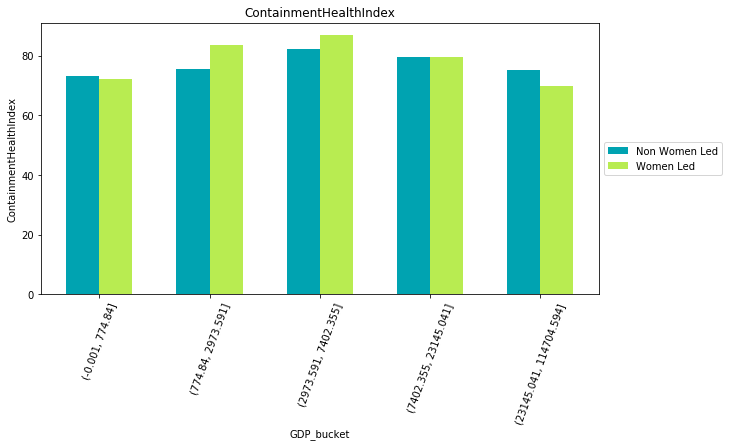

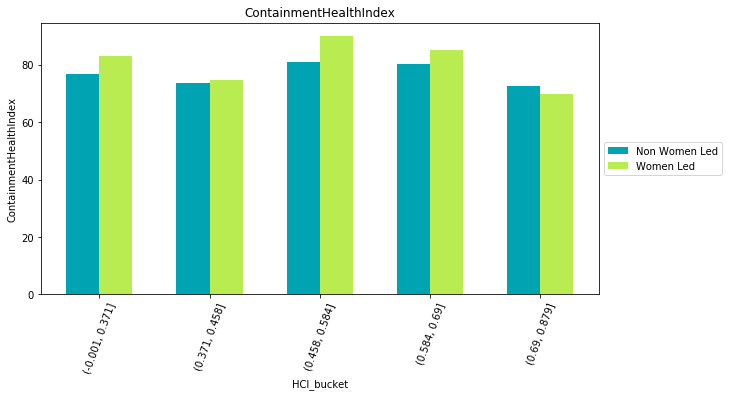

In [151]:
plot_data(bucket_column_name='GDP_bucket', index_name = 'ContainmentHealthIndex')
plot_data(bucket_column_name='HCI_bucket', index_name = 'ContainmentHealthIndex')

Observations from GDP data:
- We see that women led countries in the low GDP per capita bucket (774 to 2973) and middle GDP per capita bucket (between 2973 to 7402) have a slightly higher average maximum ContainmentHealthIndex score (varying by ~10 points on the index)
- In all other GDP buckets (the lowest GDP per capital bucket and the two highest), male led countries have a slightly higher average maximum ContainmentHealthIndex score 


Observations from HCI data:
-

# EconomicSupportIndex
This index focuses on a government's economic policies around covid.

This includes:
- Income support (direct welfare payments to people who lost jobs)
- Debt/contract relief
- Fiscal measures (ex: stimulus spending)
- Giving international support to other countries

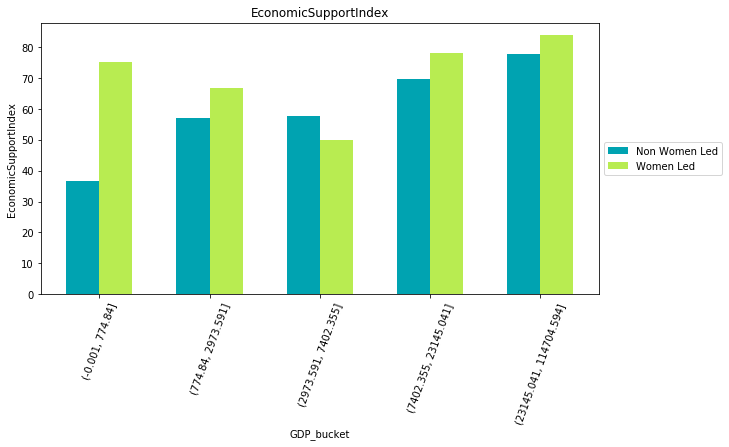

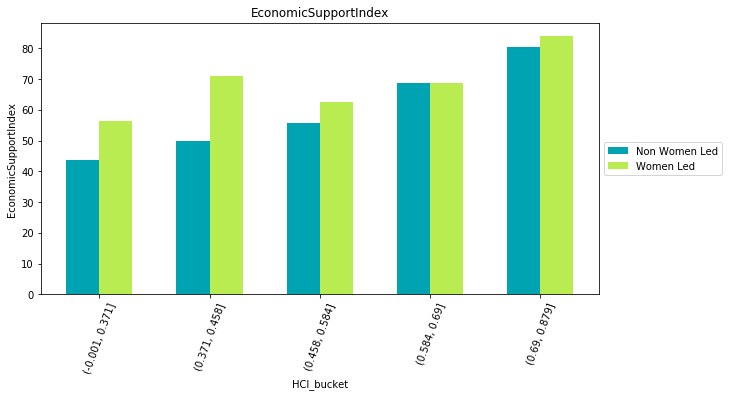

In [152]:
plot_data(bucket_column_name='GDP_bucket', index_name = 'EconomicSupportIndex')
plot_data(bucket_column_name='HCI_bucket', index_name = 'EconomicSupportIndex')

Significantly higher economic support from women led countries 

Observations from GDP data:
- We see that women led countries in all bucket except the middle bucket have significantly higher EconomicSupportIndex
- The difference is especially pronounced in the lowest GDP bucket, where women_led countries have over double the index than men led countries


Observations from HCI data:
- We see a similar trend for HCI buckets as we do with GDP buckets, with women_led countries having significantly higher EconomicSupportIndex

# GovernmentResponseIndex
This index gives an overall synthesis of the Government's response to Covid across all metrics (including all the metrics included in the previous indices such as EconomicSupportIndex and ContainmentHealthIndex

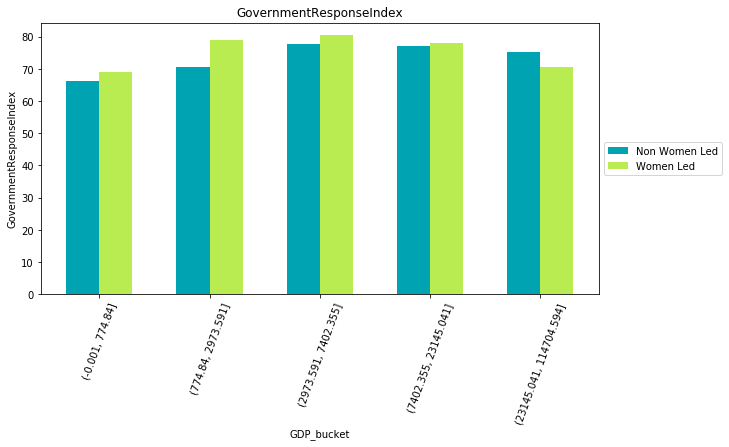

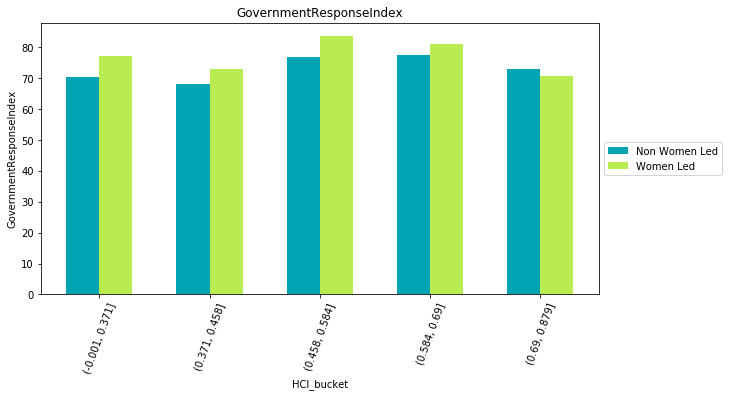

In [166]:
plot_data(bucket_column_name='GDP_bucket', index_name = 'GovernmentResponseIndex')
plot_data(bucket_column_name='HCI_bucket', index_name = 'GovernmentResponseIndex')

Significantly higher economic support from women led countries 

Observations from GDP data:
- We see that women led countries in all bucket except the highest bucket have higher GovernmentResponseIndex


Observations from HCI data:
- We see a similar trend for HCI buckets as we do with GDP buckets, with women_led countries having significantly higher GovernmentResponseIndex except in the highest bucket

# Overall Conclusions
- Our data shows an overall higher government COVID response from women-led low to medium GDP women-led countries, especially in regards to providing Economic Suppport to citizens.
- The highest GDP non-women-led countries had an overall higher government COVID response


# Analysis Notes
We only had a dataset of 21 women-led countries compared to 160 male-led countries, so this analysis is possibly skewed due to the disproportional data between the two populations. 


# PCA (Principal Component Analysis

In [167]:
maximum_values_over_time_df

,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,gender,GDP_Per_Capita,HCI,GDP_bucket,HCI_bucket
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,0.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,male,502.115487,0.400284,"(-0.001, 774.84]","(0.371, 0.458]"
Albania,ALB,20201026,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Albania,ALB,"Population, total",SP.POP.TOTL,male,5352.857411,0.634251,"(2973.591, 7402.355]","(0.584, 0.69]"
Algeria,DZA,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,62.5,Algeria,DZA,"Population, total",SP.POP.TOTL,male,3948.343279,0.534556,"(2973.591, 7402.355]","(0.458, 0.584]"
Andorra,AND,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,100.0,Andorra,AND,"Population, total",SP.POP.TOTL,male,40886.391165,0.000000,"(23145.041, 114704.594]","(-0.001, 0.371]"
Angola,AGO,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Angola,AGO,"Population, total",SP.POP.TOTL,male,2973.591160,0.362405,"(774.84, 2973.591]","(-0.001, 0.371]"
Argentina,ARG,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Argentina,ARG,"Population, total",SP.POP.TOTL,male,10006.148974,0.602145,"(7402.355, 23145.041]","(0.584, 0.69]"
Aruba,ABW,20201026,3.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Aruba,ABW,"Population, total",SP.POP.TOTL,male,0.000000,0.000000,"(-0.001, 774.84]","(-0.001, 0.371]"
Australia,AUS,20201026,3.0,0.0,3.0,1.0,2.0,1.0,4.0,1.0,...,75.0,Australia,AUS,"Population, total",SP.POP.TOTL,male,54907.101910,0.770240,"(23145.041, 114704.594]","(0.69, 0.879]"
Austria,AUT,20201026,2.0,1.0,3.0,1.0,2.0,1.0,4.0,1.0,...,87.5,Austria,AUT,"Population, total",SP.POP.TOTL,male,50277.275087,0.746740,"(23145.041, 114704.594]","(0.69, 0.879]"


In [183]:
# Cleaning data errors
# Replace NaN or Null values
df = maximum_values_over_time_df.rename(columns={'gender': 'target'})

df = df.reset_index()

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.replace(np.nan, 0, inplace=True)

# df.fillna(0, inplace=True)

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# features = ['ContainmentHealthIndex']
features = ['StringencyIndex', 'GovernmentResponseIndex', 'EconomicSupportIndex', 'ContainmentHealthIndex']


# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values



# # Standardizing the features
# x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

finalDf
# StringencyIndex',
#  'StringencyIndexForDisplay',
#  'StringencyLegacyIndex',
#  'StringencyLegacyIndexForDisplay',
#  'GovernmentResponseIndex',
#  'GovernmentResponseIndexForDisplay',
#  'ContainmentHealthIndex',
#  'ContainmentHealthIndexForDisplay',
#  'EconomicSupportIndex',
#  'EconomicSupportIndexForDisplay'

,principal component 1,principal component 2,target
0,46.847375,-37.183946,male
1,-16.146529,4.577291,male
2,-11.016278,-8.452608,male
3,-12.958921,48.991814,male
4,-17.449639,2.785880,male
5,-31.228630,-12.191701,male
6,-24.012876,14.689875,male
7,-17.202263,5.441667,male
8,-22.292624,17.660675,male
9,-10.380185,-26.162605,male


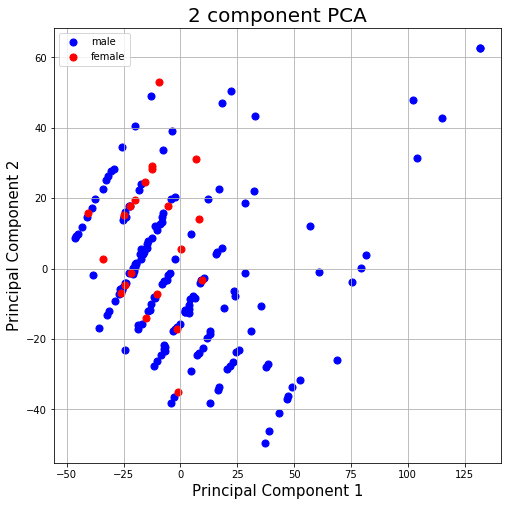

In [186]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Looking at the Principal Component Analysis, it is interesting to see that the female led countries seem very closely correlated in terms of the index values of their government responses